<a href="https://colab.research.google.com/github/abolfazlshahsavaryyy/sklearn/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
medical_charge_url="https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charge_url,"data.csv")

('data.csv', <http.client.HTTPMessage at 0x7bf8c4278d90>)

In [3]:
import pandas as pd
mdf=pd.read_csv("data.csv")

In [4]:
mdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
len(mdf[mdf["sex"]=="male"])

676

In [6]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
mdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
pip install jovian --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00


In [10]:
import jovian

In [11]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [12]:
pip install plotly seaborn --quiet


In [13]:
import plotly.express as px
import matplotlib
import  seaborn as sns

In [14]:
mdf.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [15]:
fig=px.histogram(mdf,x="age",marginal='box',nbins=100,title="distribiotion of age")


In [16]:
fig.update_layout(bargap=0.1)

In [17]:
fig.show()

In [18]:
fig=px.histogram(mdf,x="bmi",marginal='box',color_discrete_sequence=['red'],title='distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig=px.histogram(mdf,x="charges",marginal='box',color_discrete_sequence=['blue','gray','red','green'],color='region',title="annual medical charge")

In [20]:
fig.show()

In [21]:
print("male: "+ str(len(mdf[mdf['sex']=='male'])))
print("female: "+ str(len(mdf[mdf['sex']=='female'])))
print(set(mdf.region))

male: 676
female: 662
{'northeast', 'southwest', 'northwest', 'southeast'}


In [22]:
px.histogram(mdf,x='smoker',color='children',barmode='stack')

In [23]:
fig=px.scatter(mdf,x='age',y='charges',color='smoker',title="age vs charges")
fig.show()

In [24]:
fig=px.scatter(mdf,x='sex',y='charges',title="bmi vs charges")
fig.show()

In [25]:
px.violin(mdf,x='children',y='charges')

In [26]:
mdf.charges.corr(mdf.age)

0.2990081933306476

In [27]:
mdf.charges.corr(mdf.bmi)

0.19834096883362895

In [28]:
smoker_numerical=mdf['smoker'].apply(lambda x :1 if x=='yes' else 0)
smoker_numerical

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [29]:
mdf.charges.corr(smoker_numerical)

0.787251430498478

In [30]:
px.scatter(mdf,x=smoker_numerical,y=mdf['charges'])

In [31]:
print(mdf.select_dtypes(include='number').corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<Axes: >

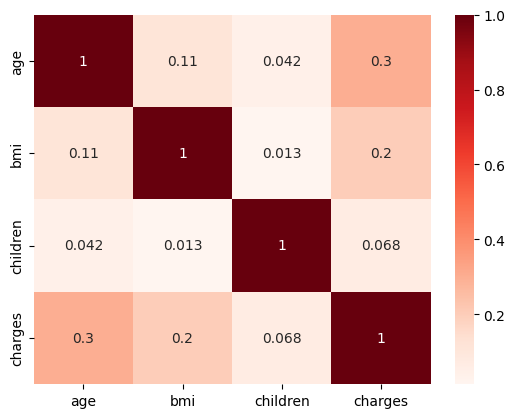

In [32]:
sns.heatmap(mdf.select_dtypes(include='number').corr(),cmap='Reds',annot=True)


<Axes: xlabel='age', ylabel='charges'>

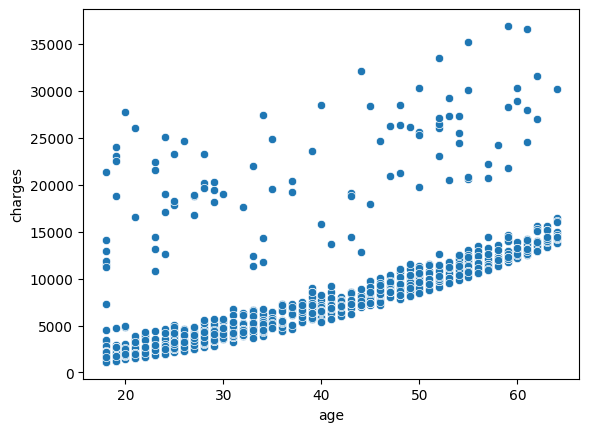

In [33]:
nsmdf=mdf[mdf['smoker']=='no']
sns.scatterplot(data=nsmdf,x='age',y='charges')

In [35]:
def astemed_charges(age,w:int,b:int):
  return age*w+b


In [72]:
# Assuming ages is a pandas Series (e.g., nsmdf['age'])
ages = nsmdf['age']

w, b = 270, -3800
ast_charges = astemed_charges(ages, w, b)

# Corrected iteration
counter=0
for age,charge in zip(ages,ast_charges):
  print(str(age)+": "+str(charge))
  counter+=1
  if counter==10:
    break


18: 1060
28: 3760
33: 5110
32: 4840
31: 4570
46: 8620
37: 6190
37: 6190
60: 12400
25: 2950


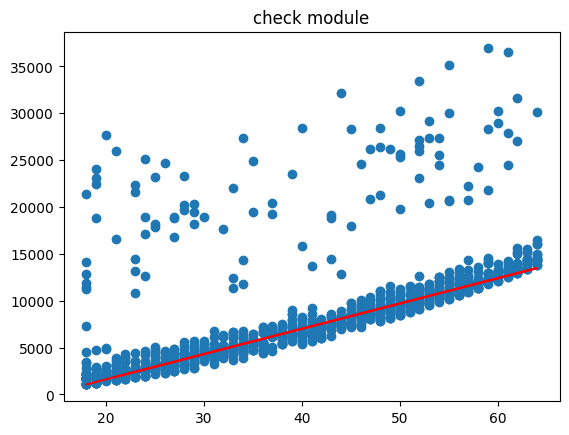

In [73]:

plt.scatter(nsmdf['age'],nsmdf['charges'])
plt.plot(ages,ast_charges,color='red')
plt.title("check module")
plt.show()

In [74]:
def try_astemed(w,b):
  ast_cahrges=astemed_charges(nsmdf['age'],w,b)
  y_test=nsmdf['charges']
  x_test=nsmdf['age']

  plt.scatter(x_test,y_test)
  plt.plot(x_test,ast_charges,color='red')
  plt.title("check module")
  plt.xlabel="ages"
  plt.ylabel="charges"
  plt.show()

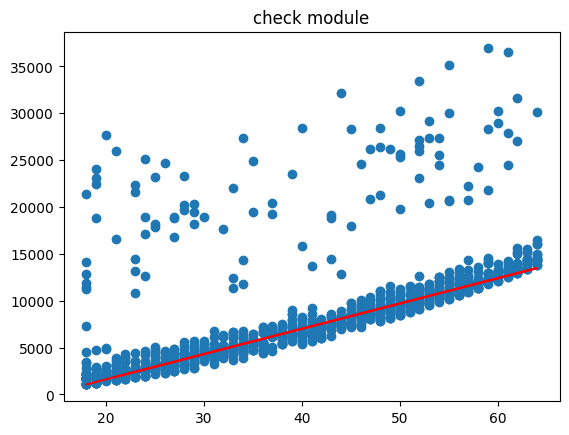

In [78]:
try_astemed(200,000)

In [84]:
def cul_rmse(target,pred):
  return np.sqrt(np.mean(np.square(target-pred)))

In [85]:
cul_rmse(nsmdf['charges'],ast_charges)

4929.6233160122965

In [99]:
def try_astemed(weight,c):
  ast_cahrges=astemed_charges(nsmdf['age'],weight,c)
  y_test=nsmdf['charges']
  x_test=nsmdf['age']

  plt.scatter(x_test,y_test)
  plt.plot(x_test,ast_cahrges,color='red')
  plt.title("check module")
  plt.xlabel="ages"
  plt.ylabel="charges"
  plt.show()

  rsme=cul_rmse(y_test,ast_cahrges)
  print(rsme)

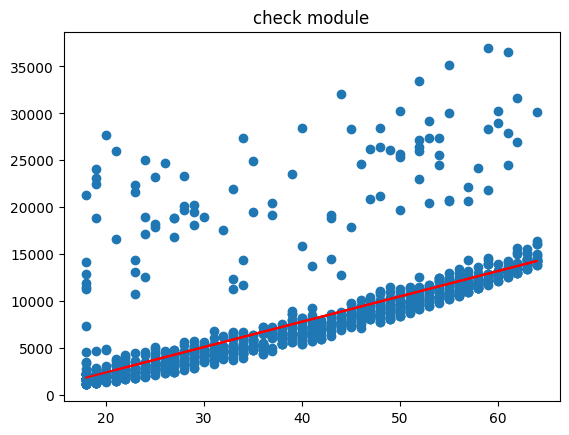

4730.837444535129


In [105]:
try_astemed(270,-3000)